In [9]:
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

archivo='DATA-PRUEBA_TUTORIAS 2017-2020-UNMSM.xlsx'
datos=pd.read_excel('C:\\Users\\acer\\Pictures\\6to CICLO\\BIG DATA\\EXAMEN\\CASO-UNMSM\\'+archivo)
#datoglobal=pd.concat(datos,ignore_index=True)
datos.head()


,cod_alumno,cod_semestre,cod_facultad,cod_escuela,num_res_autoriza,cod_tipo_autorizacion
0,08010216,20171,1,1,RD 0408-D-FM-2017,AM
1,13010409,20171,1,1,RD 0408-D-FM-2017,AM
2,13010044,20171,1,1,RD 0432-D-FM-2017,AM
3,12010212,20171,1,1,RD 0472-D-FM-2017,AM
4,12010242,20171,1,1,RD 0472-D-FM-2017,AM


In [11]:
#DETERMINAR POR FACULTAD, CANTIDAD DE ALUMNOS CON TUTORIA (SEMESTRE 2017 1-2, 2018 1-2 y 2019 1-2)

tutorias=datos.groupby(['cod_facultad','cod_semestre'])['cod_alumno'].nunique().reset_index(name='TUTORIAS')
tutorias

,cod_facultad,cod_semestre,TUTORIAS
0,1,20171,176
1,1,20172,105
2,1,20181,88
3,1,20182,98
4,1,20191,57
...,...,...,...
148,20,20182,342
149,20,20191,347
150,20,20192,318
151,20,20201,309


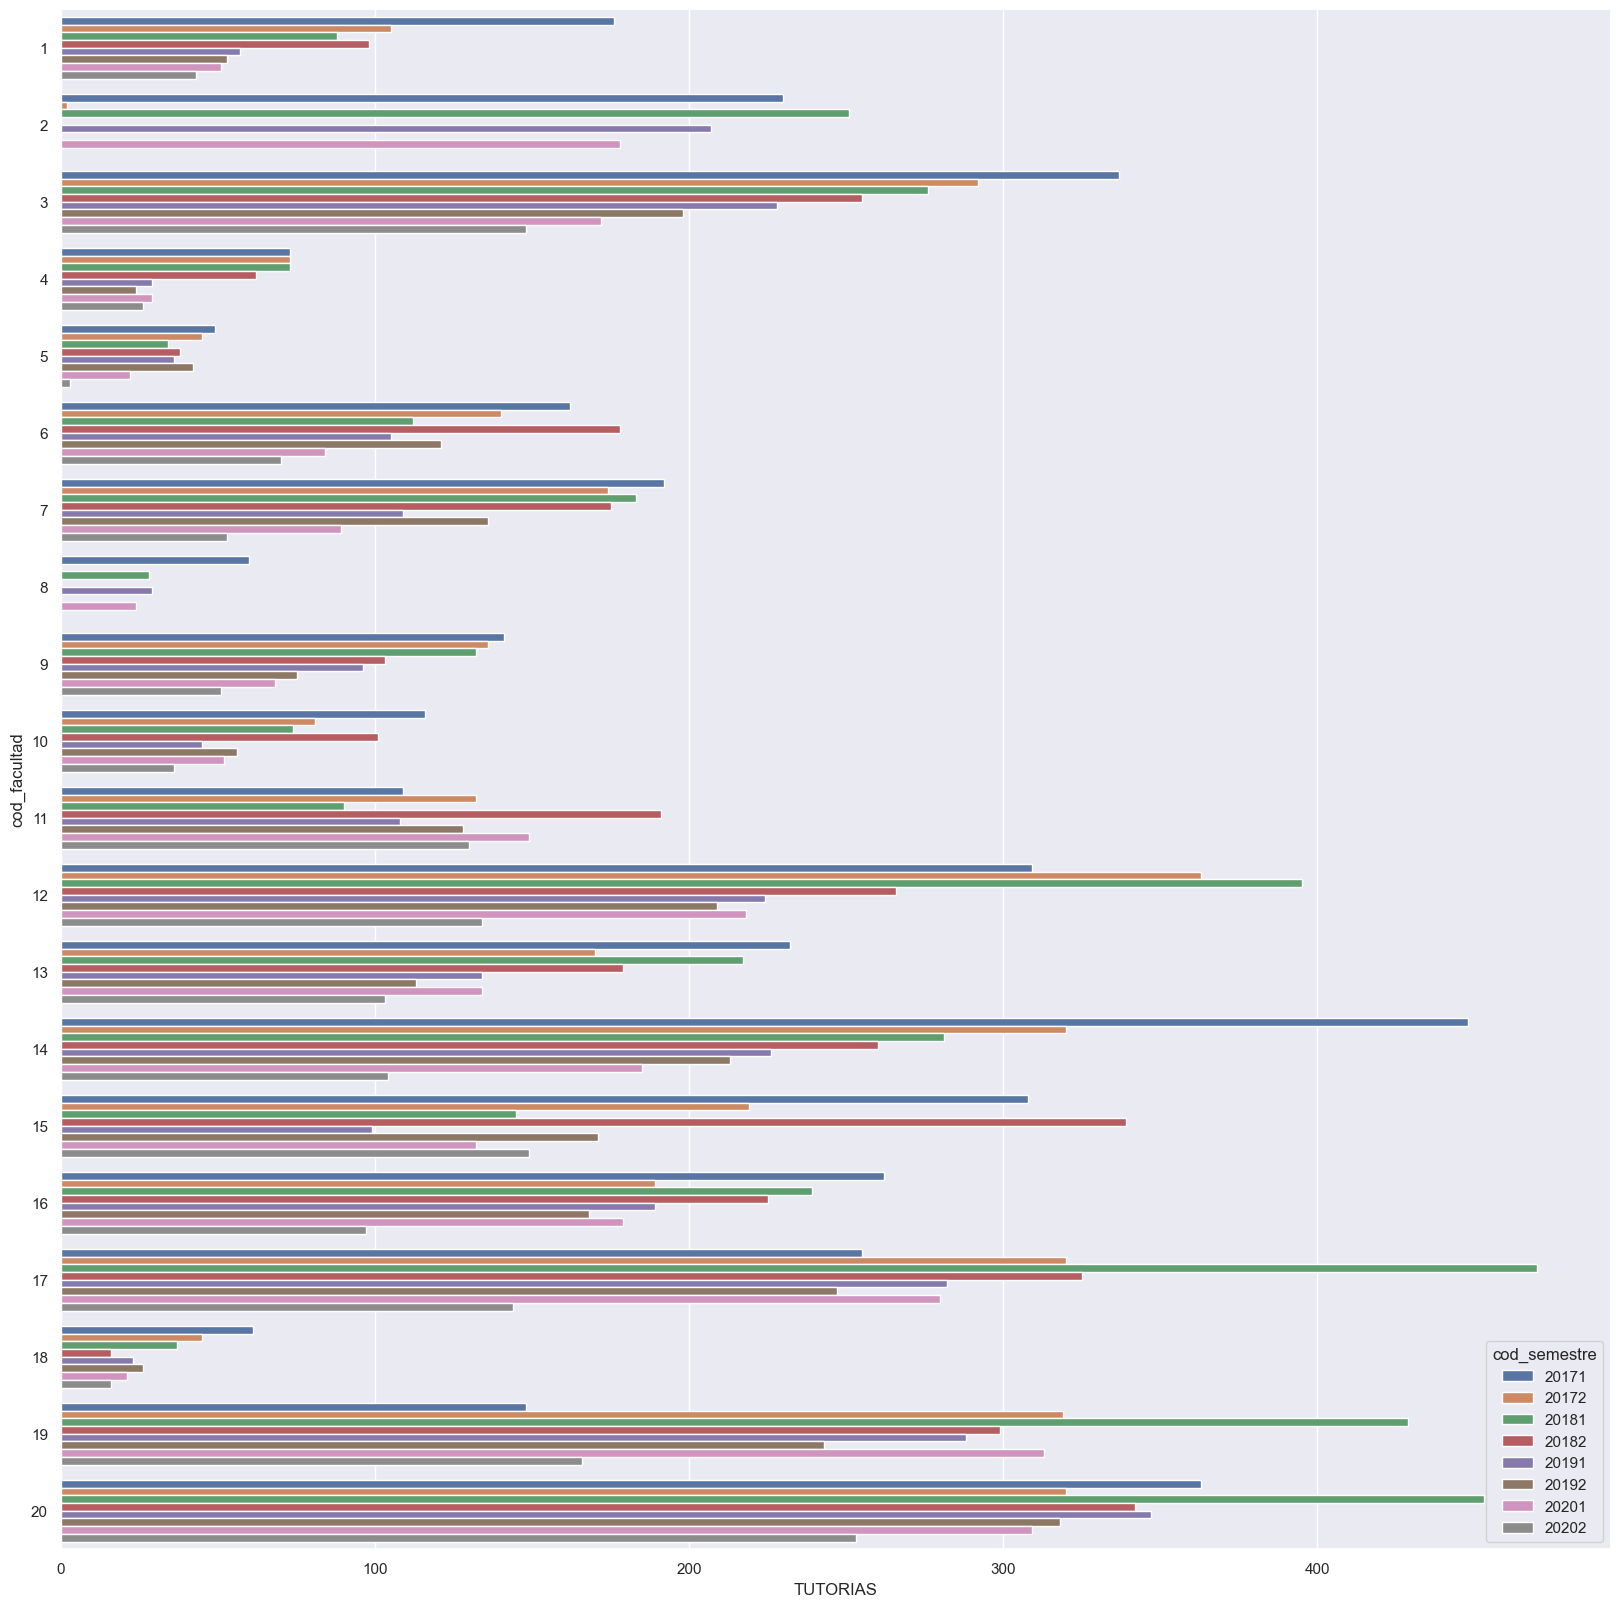

In [14]:
sb.set(rc={'figure.figsize':(20,20)})
grafica=sb.barplot(x='TUTORIAS',y='cod_facultad',data=tutorias,hue='cod_semestre',orient='h')

In [19]:
#DETERMINAR Por escuela,CANTIDAD DE ALUMNOS CON TUTORIA (SEMESTRE 2017 1-2, 2018 1-2 y 2019 1-2)

tutorias2=datos.groupby(['cod_escuela','cod_semestre'])['cod_alumno'].nunique().reset_index(name='TUTORIAS')
tutorias2



,cod_escuela,cod_semestre,TUTORIAS
0,0,20201,33
1,0,20202,37
2,1,20171,1661
3,1,20172,1518
4,1,20181,1739
...,...,...,...
69,9,20182,14
70,9,20191,14
71,9,20192,6
72,9,20201,4


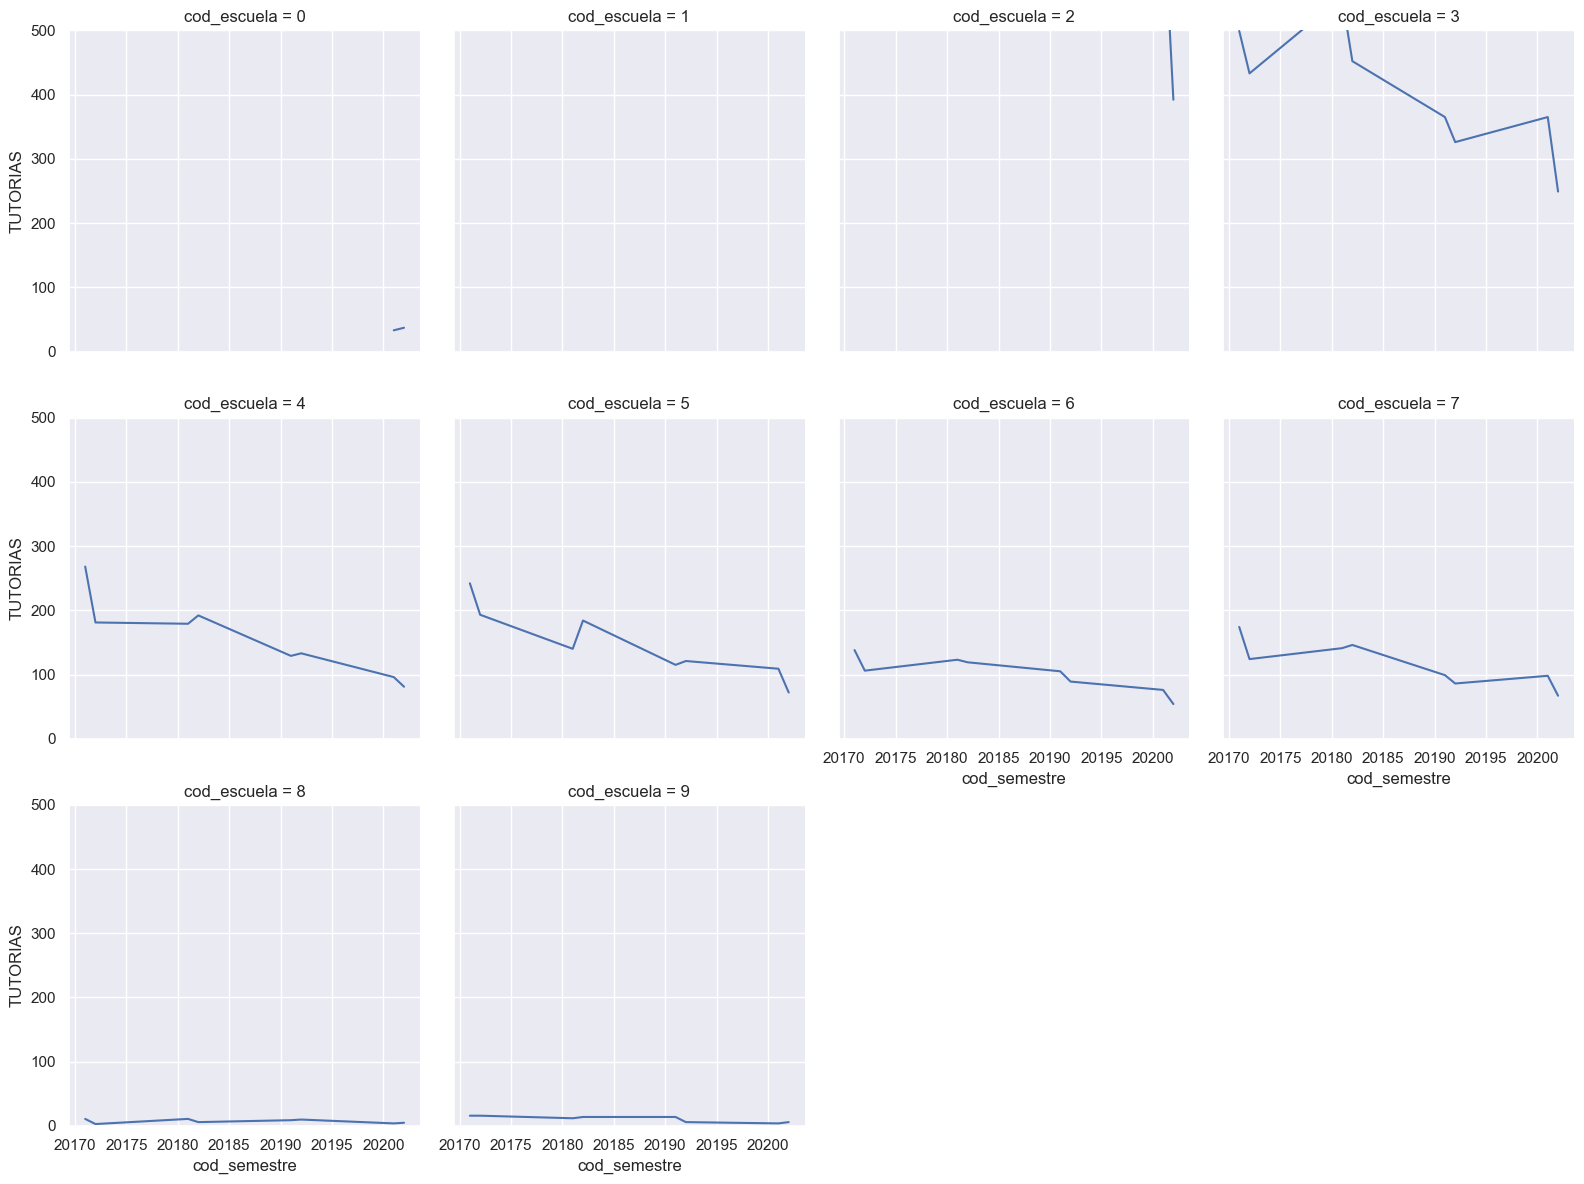

In [22]:
#Grafica por escuela categorizado por semestre para mejor entendimiento

g = sb.FacetGrid(tutorias2, col="cod_escuela", height=4, col_wrap=4, ylim=(0, 500))
g.map(sb.lineplot, "cod_semestre", "TUTORIAS", ci=None)